میزان سود کارگردان های مختلف

In [1]:
import warnings
import ast

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 70)

In [3]:
df_eda = pd.read_csv('df_preprocessed.csv')

In [4]:
df_eda['profit_categorized'].value_counts()

profit_categorized
profit       2285
no profit     937
Name: count, dtype: int64

In [5]:
df_eda.columns

Index(['budget', 'genres', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration', 'tagline',
       'vote_average', 'num_voted_users', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'budget_categorized',
       'profit', 'profit_categorized', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'other', 'year',
       'years_since_release', 'decade', 'month', 'season',
       'production_companies_list', 'actor_list', 'top actors', 'top_director',
       'language_summarized', 'vote_average_categorized',
       'plot_keywords_list'],
      dtype='object')

In [6]:
df_eda.head()

,budget,genres,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,tagline,vote_average,num_voted_users,country,director_name,actor_1_name,actor_2_name,actor_3_name,budget_categorized,profit,profit_categorized,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Science Fiction,Thriller,other,year,years_since_release,decade,month,season,production_companies_list,actor_list,top actors,top_director,language_summarized,vote_average_categorized,plot_keywords_list
0,237.0,Action|Adventure|Fantasy|Science Fiction,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787.965087,162.0,Enter the World of Pandora.,7.2,11800.0,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,high,2550.965087,profit,True,True,False,False,False,False,False,True,False,False,False,True,False,False,2009,15,2000,12,winter,"['Ingenious Film Partners', 'Twentieth Century...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,0,English,popular,"['culture', 'clash', 'future', 'space', 'war',..."
1,300.0,Adventure|Fantasy|Action,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961.000000,169.0,"At the end of the world, the adventure begins.",6.9,4500.0,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,high,661.000000,profit,True,True,False,False,False,False,False,True,False,False,False,False,False,False,2007,17,2000,5,spring,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",0,0,English,average,"['ocean', 'drug', 'abuse', 'exotic', 'island',..."
2,245.0,Action|Adventure|Crime,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880.674609,148.0,A Plan No One Escapes,6.3,4466.0,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,high,635.674609,profit,True,True,False,False,True,False,False,False,False,False,False,False,False,False,2015,9,2010,10,autumn,"['Columbia Pictures', 'Danjaq', 'B24']","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",0,0,Not English,below_avg,"['spy', 'based', 'on', 'novel', 'secret', 'age..."
3,250.0,Action|Crime|Drama|Thriller,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084.939099,165.0,The Legend Ends,7.6,9106.0,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,high,834.939099,profit,True,False,False,False,True,True,False,False,False,False,False,False,True,False,2012,12,2010,7,summer,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","['Christian Bale', 'Michael Caine', 'Gary Oldm...",0,0,English,popular,"['dc', 'comics', 'crime', 'fighter', 'terroris..."
4,260.0,Action|Adventure|Science Fiction,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284.139100,132.0,"Lost in our world, found in another.",6.1,2124.0,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,high,24.139100,no profit,True,True,False,False,False,False,False,False,False,Fa

In [7]:
def str_to_list(x):
    return ast.literal_eval(x)

df_eda['production_companies_list'] = df_eda['production_companies_list'].apply(str_to_list)

In [8]:
def plot_categorical_distribution(df, x_column, hue_column, title='', rotation=None):
    """
    Plots the distribution of a categorical variable based on two categorical variables.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        x_column (str): The column name representing one categorical variable.
        hue_column (str): The column name representing another categorical variable for comparison.

    Returns:
        None
    """
    # Group by the two categorical variables and calculate counts
    counts = df.groupby([x_column, hue_column]).size().reset_index(name='Count')

    # Calculate total count for each category in x_column
    total_counts = counts.groupby(x_column)['Count'].transform('sum')

    # Calculate percentages
    counts['Percentage'] = np.round((counts['Count'] / total_counts) * 100, 1)

    # Plot
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(data=counts, x=x_column, y='Percentage', hue=hue_column, palette='ch:s=-.2,r=.6')

    # Set x-axis label
    plt.xlabel(x_column, fontsize=15)
    plt.xticks(fontsize=12, rotation=90)

    # Set y-axis label
    plt.ylabel('Percentage', fontsize=15)
    plt.yticks(fontsize=12)

    # Show the values on each bar
    for p in ax.patches:
        if f"{p.get_height()}%" != '0%':
            ax.annotate(f"{p.get_height()}%", (p.get_x() + p.get_width() / 2., p.get_height() + .5),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                        textcoords='offset points', rotation=rotation)

    # Show the plot
    plt.title(title)
    plt.legend(title=hue_column, title_fontsize='13')
    plt.show()

In [9]:
def plot_donut_chart(df, feature, title=''):
    """
    Plots a donut chart based on the percentage of each category in a specified feature.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        feature (str): The column name representing the categorical feature.

    Returns:
        None
    """
    # Calculate percentage of each category in the feature
    category_counts = df[feature].value_counts(normalize=True) * 100

    # Generate a consistent color palette based on the number of categories
    num_categories = len(category_counts)
    colors = plt.cm.tab10(np.arange(num_categories))

    # Plot
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    # Draw a circle at the center of the pie to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.80, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.axis('equal')

    # Add a title
    plt.title(title)

# Example usage
# Assuming df is your DataFrame and 'feature' is the column name you want to plot
# plot_donut_chart(df, 'feature', title='Donut Chart')


In [10]:
def plot_numerical_histogram(data, column_name, bins=50):
    """
    Plot a histogram of a numerical column in the dataset using Seaborn.

    Parameters:
    - data: DataFrame, the dataset containing the numerical column
    - column_name: str, the name of the numerical column to plot

    Returns:
    - None
    """
    # Check if the column exists in the dataset
    if column_name not in data.columns:
        print(f"Error: '{column_name}' column not found in the dataset.")
        return
    
    # Plot histogram using Seaborn
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], kde=True, color='skyblue', bins=bins)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
# overall anlysis

In [12]:
import numpy as np

# Log transformation of 'budget' column
df_eda['budget_log'] = np.log1p(df_eda['budget'])

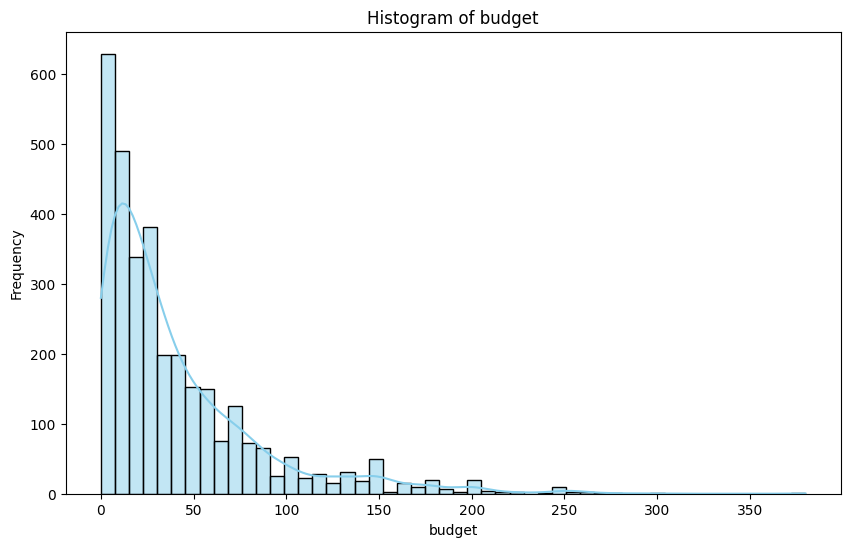

In [13]:
plot_numerical_histogram(df_eda, 'budget')

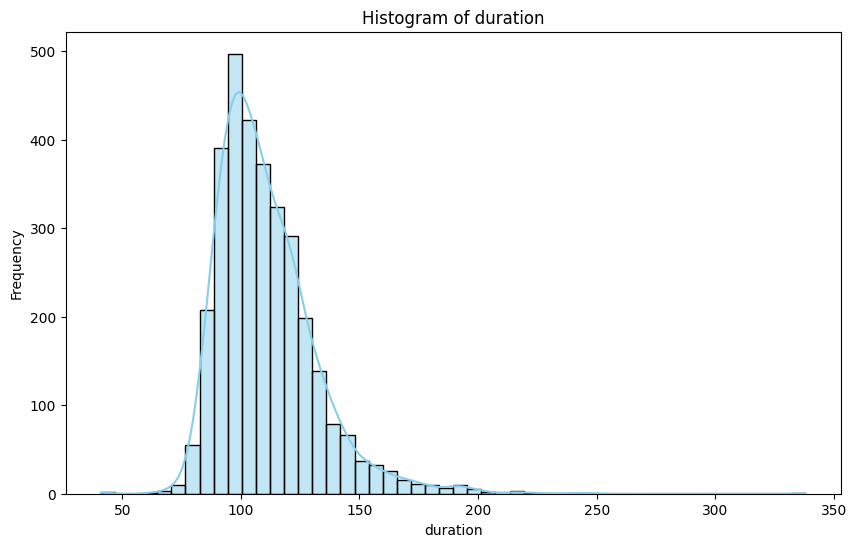

In [14]:
plot_numerical_histogram(df_eda, 'duration', bins = 50)

In [15]:
df_eda.columns

Index(['budget', 'genres', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration', 'tagline',
       'vote_average', 'num_voted_users', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'budget_categorized',
       'profit', 'profit_categorized', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'other', 'year',
       'years_since_release', 'decade', 'month', 'season',
       'production_companies_list', 'actor_list', 'top actors', 'top_director',
       'language_summarized', 'vote_average_categorized', 'plot_keywords_list',
       'budget_log'],
      dtype='object')

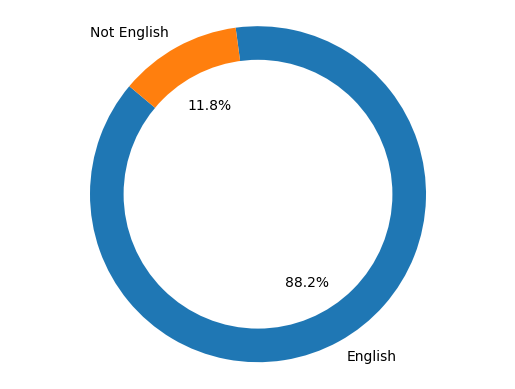

In [16]:
plot_donut_chart(df_eda, 'language_summarized')

### Question: Which genres have the highest percentage of unprofitable movies?

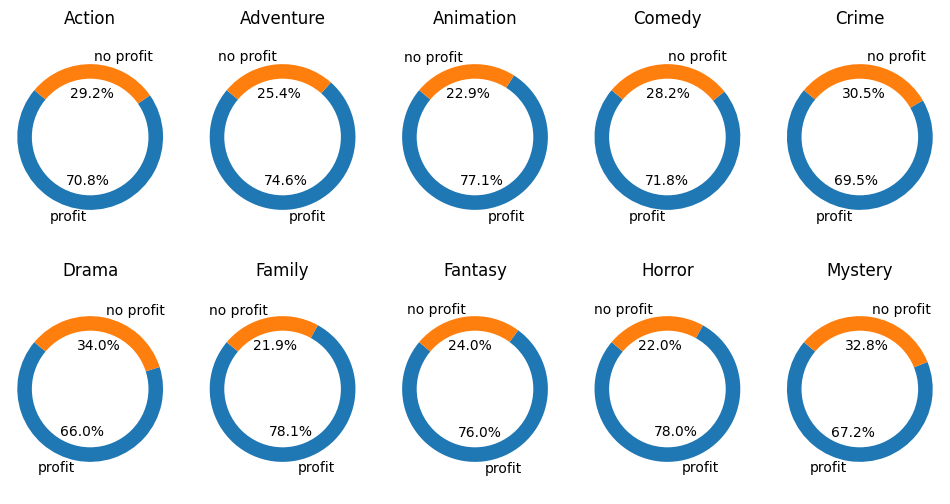

In [49]:
genres_list = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery']

plt.figure(figsize=(12,6))
j = 1
for i in genres_list:
    plt.subplot(2,5,j)
    j = j + 1
    plot_donut_chart(df_eda[df_eda[i] == 1], 'profit_categorized', title=i)

**Insight:** According to the analysis, drama, mystery, and crime genres stand out with the highest percentage of no-profit films compared to other genres. This suggests that movies falling within these categories are more prone to failing in generating revenue sufficient to

### Question: What is the distribution of profitability and unprofitability across top directors?

In [17]:
df_top_director = df_eda[df_eda['top_director'] == 1]

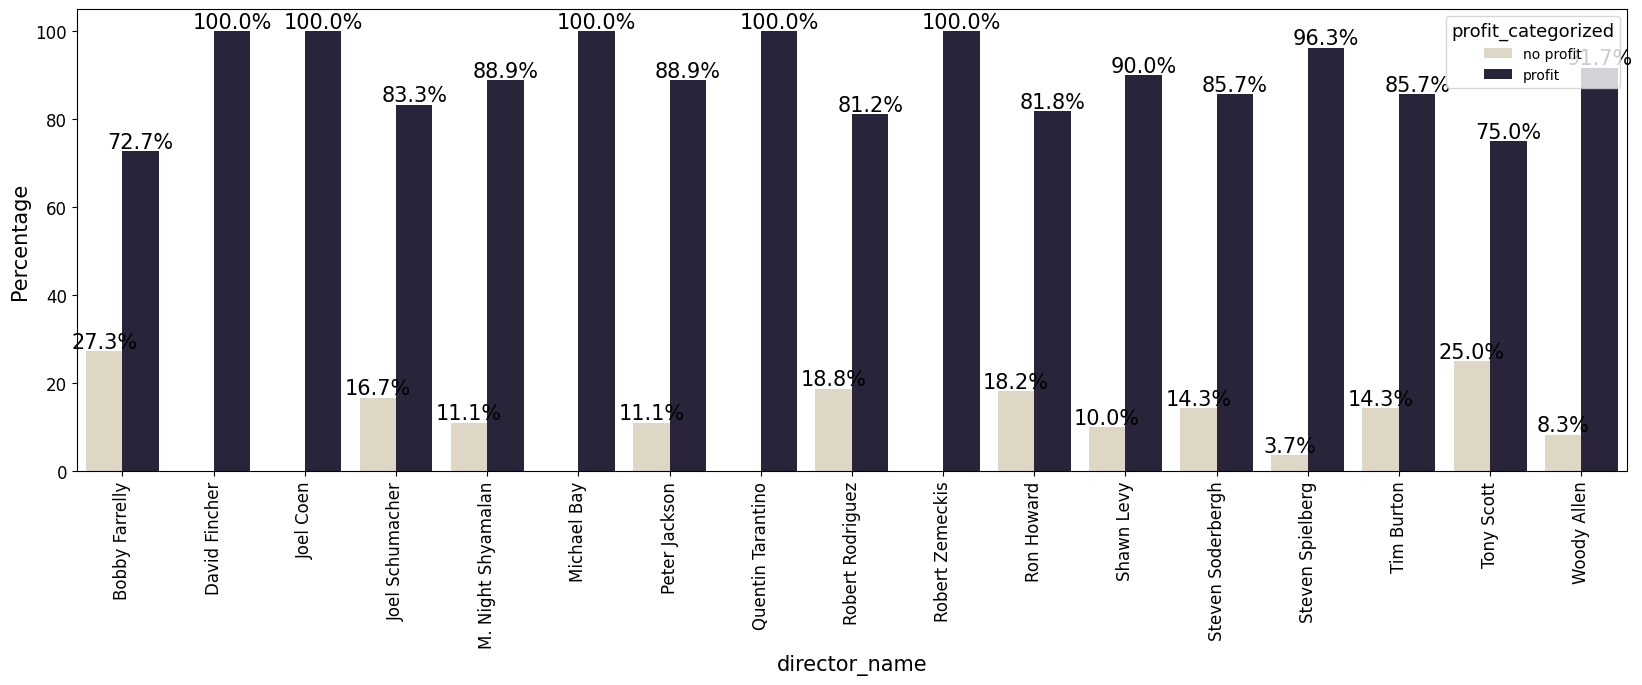

In [18]:
plot_categorical_distribution(df=df_top_director, x_column='director_name', hue_column='profit_categorized')

**Insight:** Among the top directors analyzed, including David Fincher, Joel Coen, Michael Bay, Quentin Tarantino, Robert Zemeckis, and Steven Spielberg, it appears that they have a higher tendency to produce profitable movies compared to other directors. This observation suggests that these directors have a track record of creating commercially successful films, which likely contributes to their continued prominence in the industry. Factors contributing to their success may include their storytelling abilities, filmmaking techniques, and established fan bases.

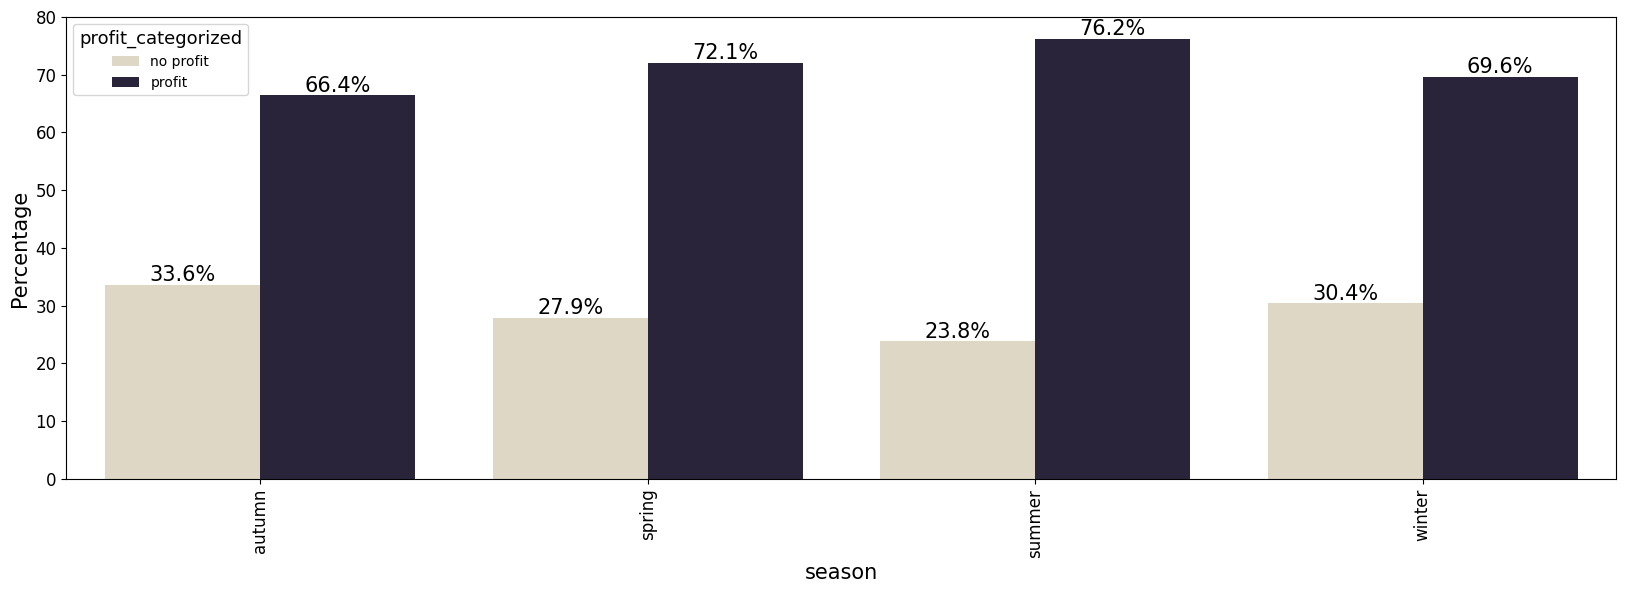

In [19]:
plot_categorical_distribution(df=df_eda, x_column='season', hue_column='profit_categorized')

#### ًQuestion: In what period were the films produced more profitable?

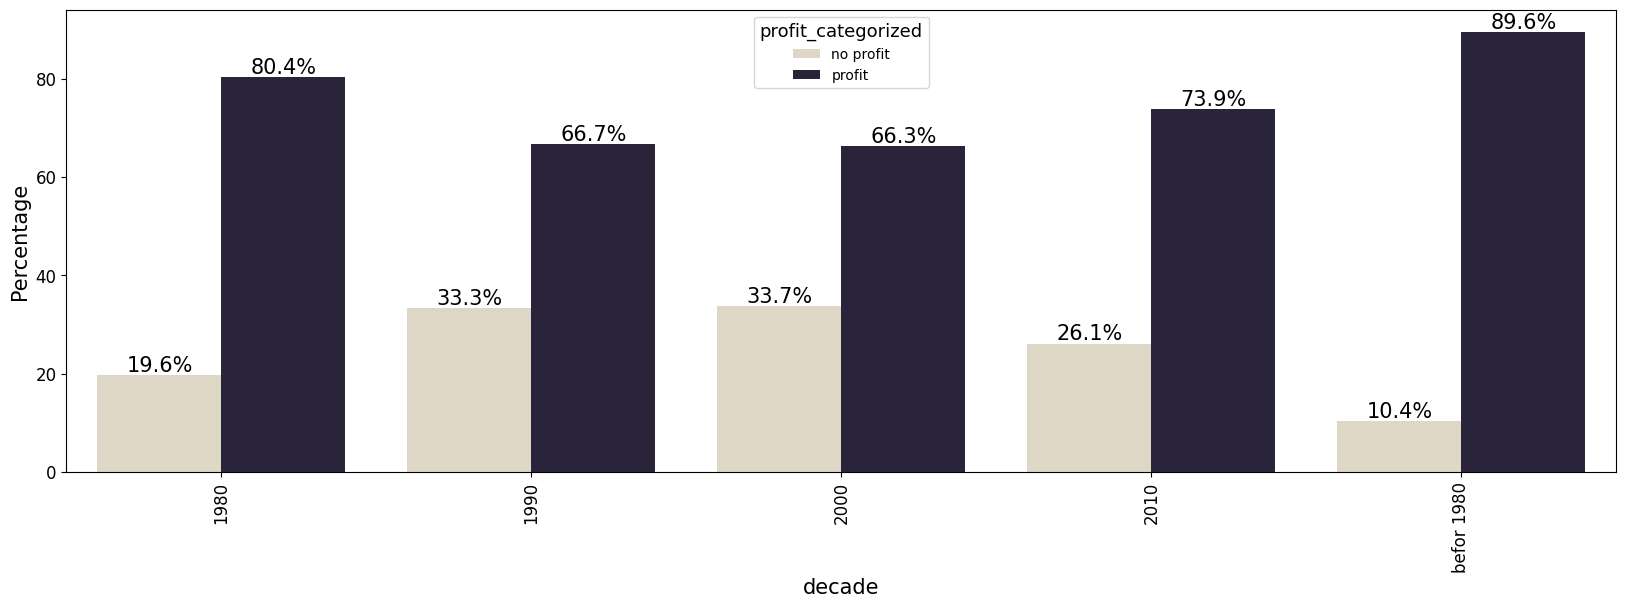

In [20]:
plot_categorical_distribution(df=df_eda, x_column='decade', hue_column='profit_categorized')

In [21]:
df_befor_80 = df_eda[df_eda['decade'] == 'befor 1980']

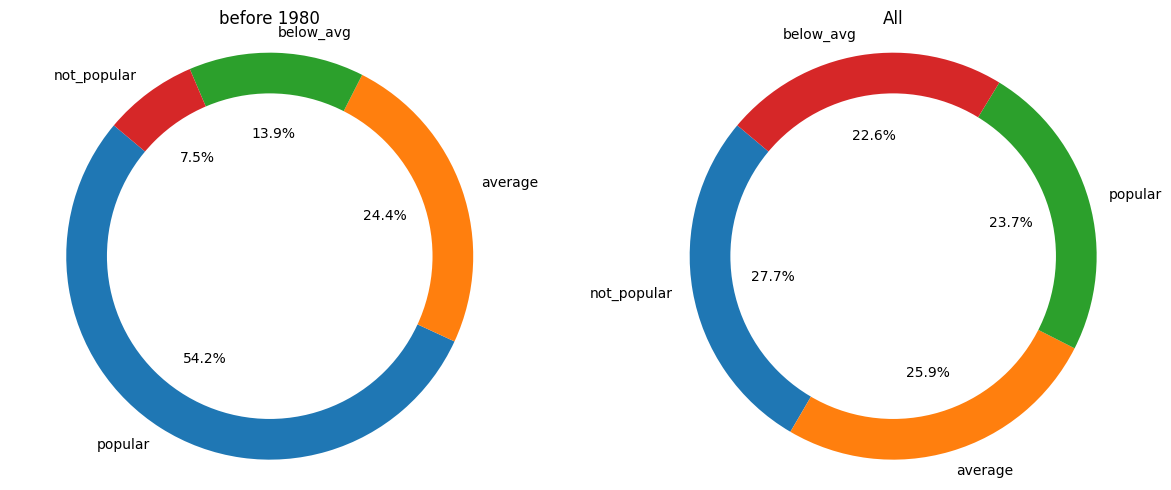

In [89]:

plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='vote_average_categorized', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='vote_average_categorized', title='All')

# Show the plot
plt.tight_layout()
plt.show()

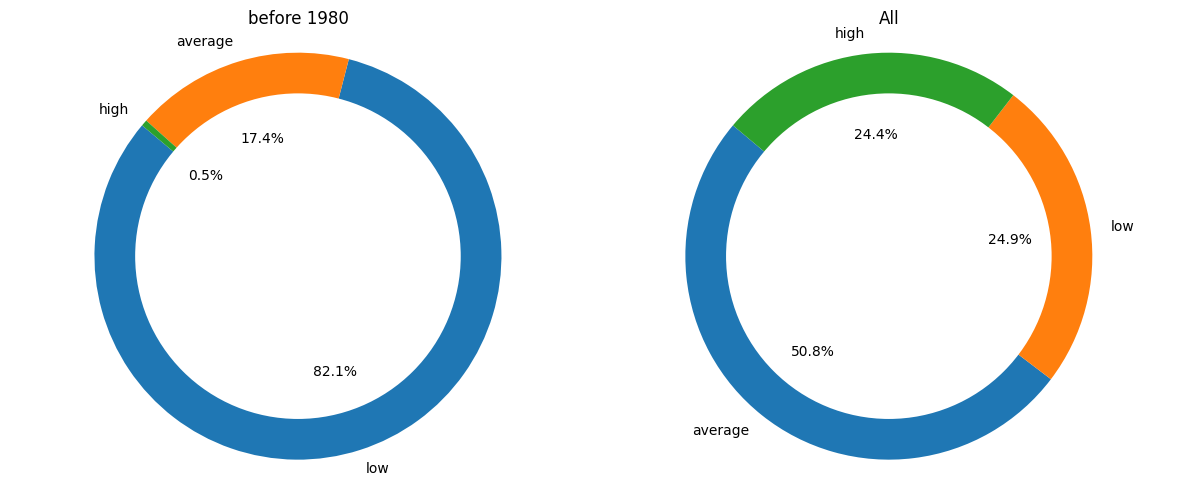

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='budget_categorized', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='budget_categorized', title='All')

# Show the plot
plt.tight_layout()
plt.show()

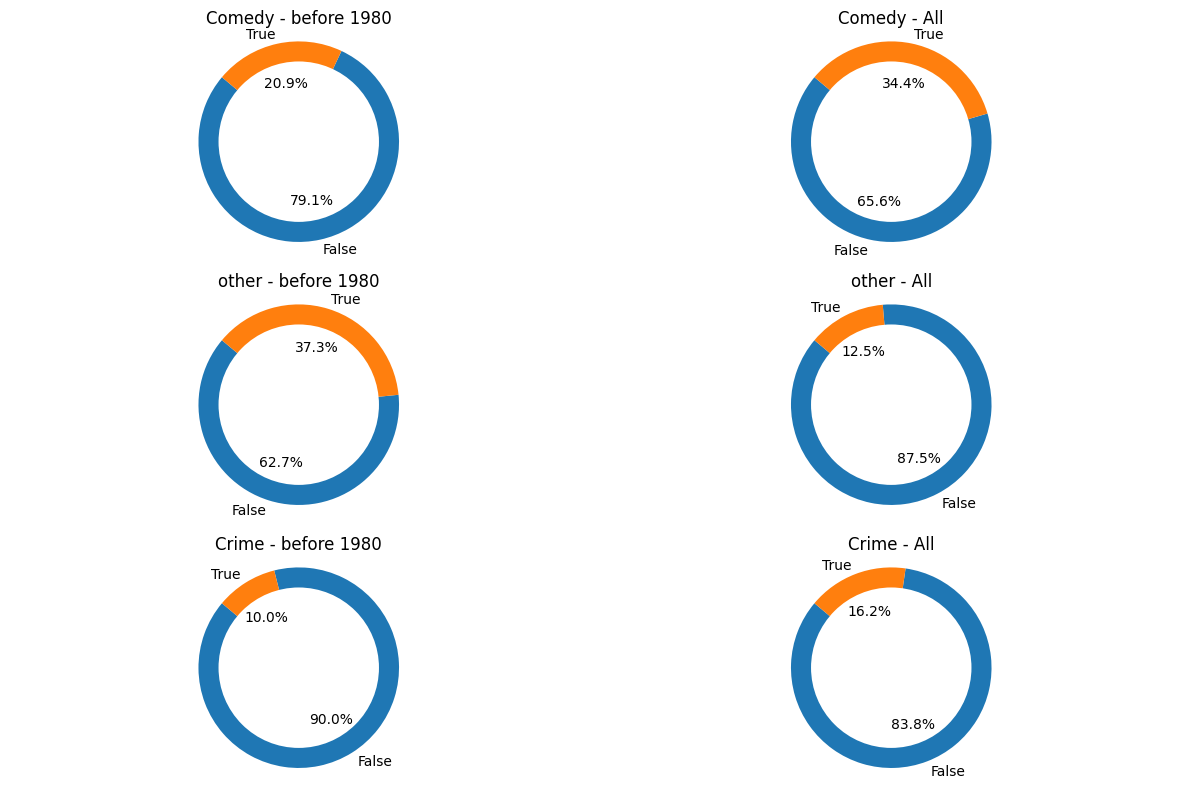

In [95]:
plt.figure(figsize=(12, 8))

# comedy
plt.subplot(3,2,1)
plot_donut_chart(df=df_befor_80, feature='Comedy', title='Comedy - before 1980')

plt.subplot(3,2,2)
plot_donut_chart(df=df_eda, feature='Comedy', title='Comedy - All')

plt.subplot(3,2,3)
plot_donut_chart(df=df_befor_80, feature='other', title='other - before 1980')

plt.subplot(3,2,4)
plot_donut_chart(df=df_eda, feature='other', title='other - All')

plt.subplot(3,2,5)
plot_donut_chart(df=df_befor_80, feature='Crime', title='Crime - before 1980')

plt.subplot(3,2,6)
plot_donut_chart(df=df_eda, feature='Crime', title='Crime - All')

# Show the plot
plt.tight_layout()
plt.show()

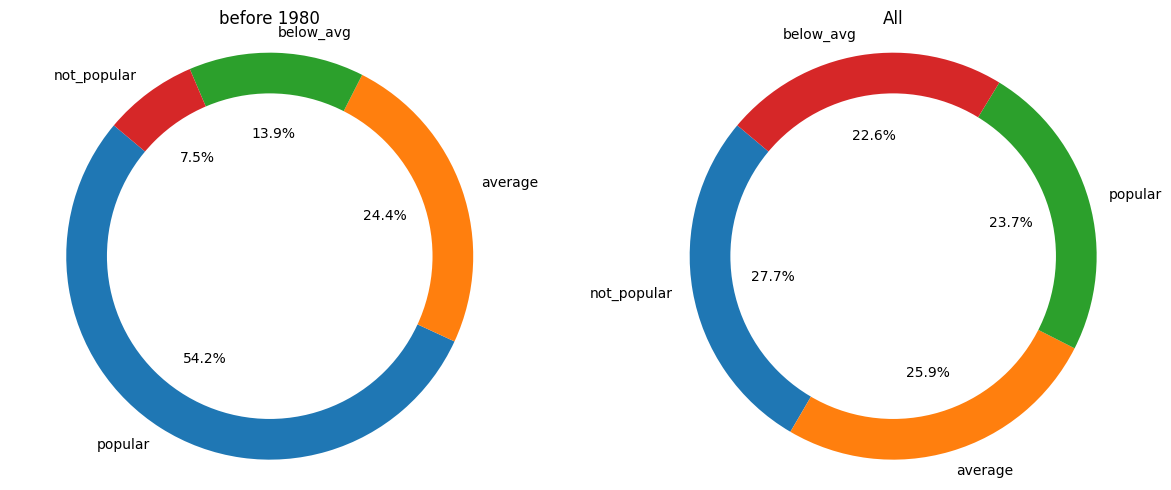

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plot_donut_chart(df=df_befor_80, feature='vote_average_categorized', title='before 1980')

plt.subplot(1,2,2)
plot_donut_chart(df=df_eda, feature='vote_average_categorized', title='All')

# Show the plot
plt.tight_layout()
plt.show()

### Question 1: Who have been the most prolific actors?
### Question 2: Which actors have played the most roles in profitable films
### Question 3: Which actors have played the most roles in unprofitable films?

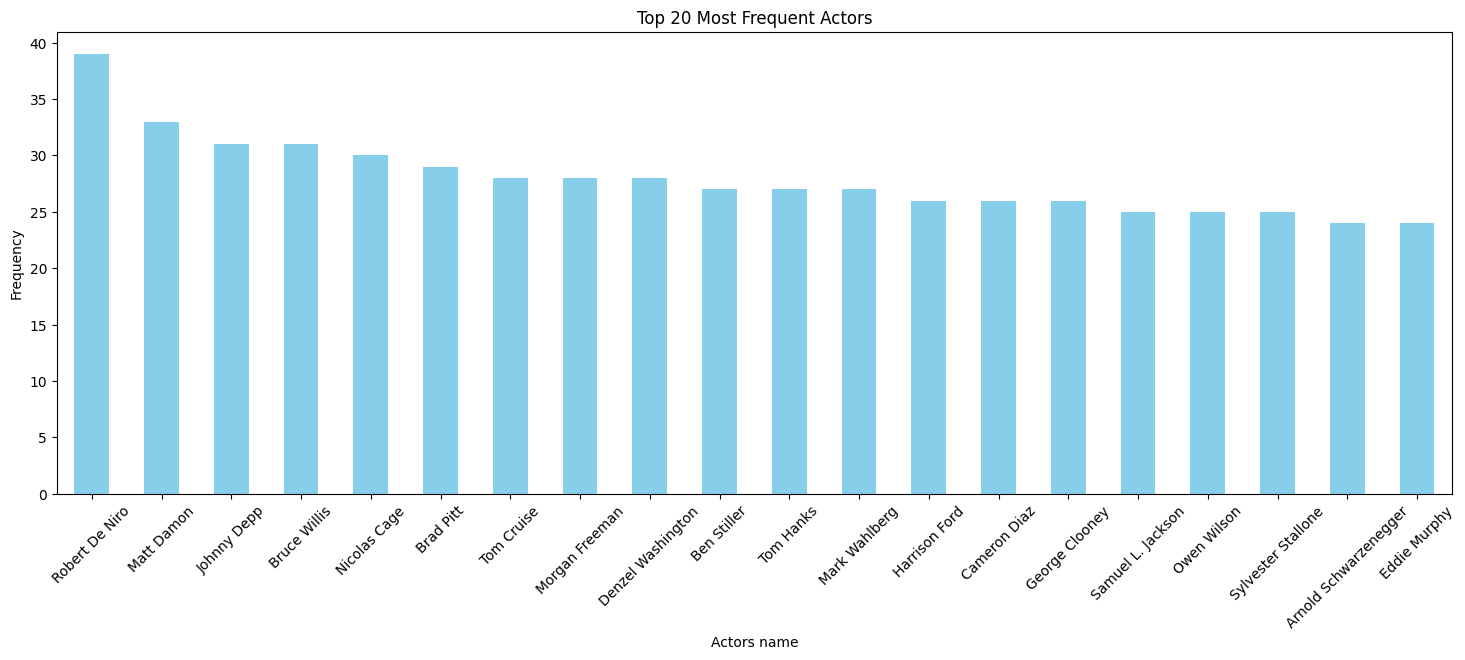

In [28]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_eda['actor_1_name'], df_eda['actor_2_name'], df_eda['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20  # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [29]:
df_profit = df_eda[df_eda['profit_categorized'] == 'profit']
df_no_profit = df_eda[df_eda['profit_categorized'] != 'profit']

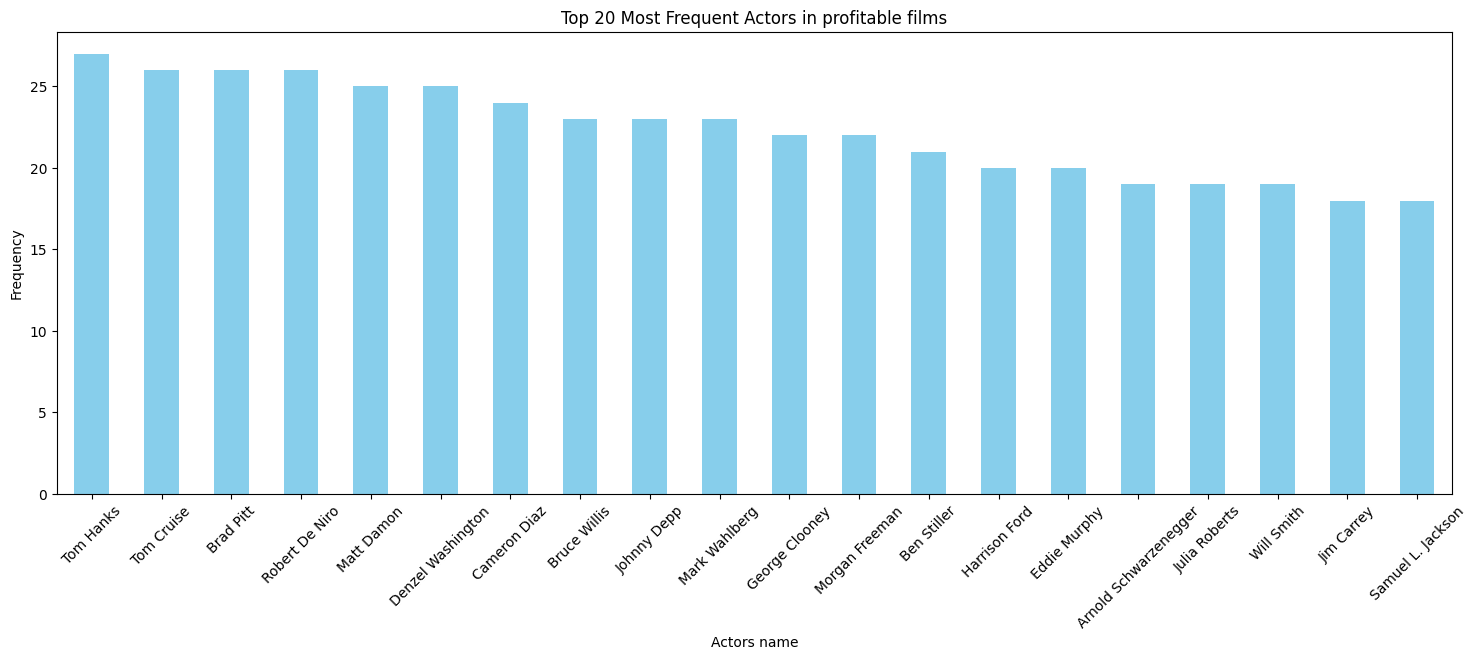

In [51]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_profit['actor_1_name'], df_profit['actor_2_name'], df_profit['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20 # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors in profitable films')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

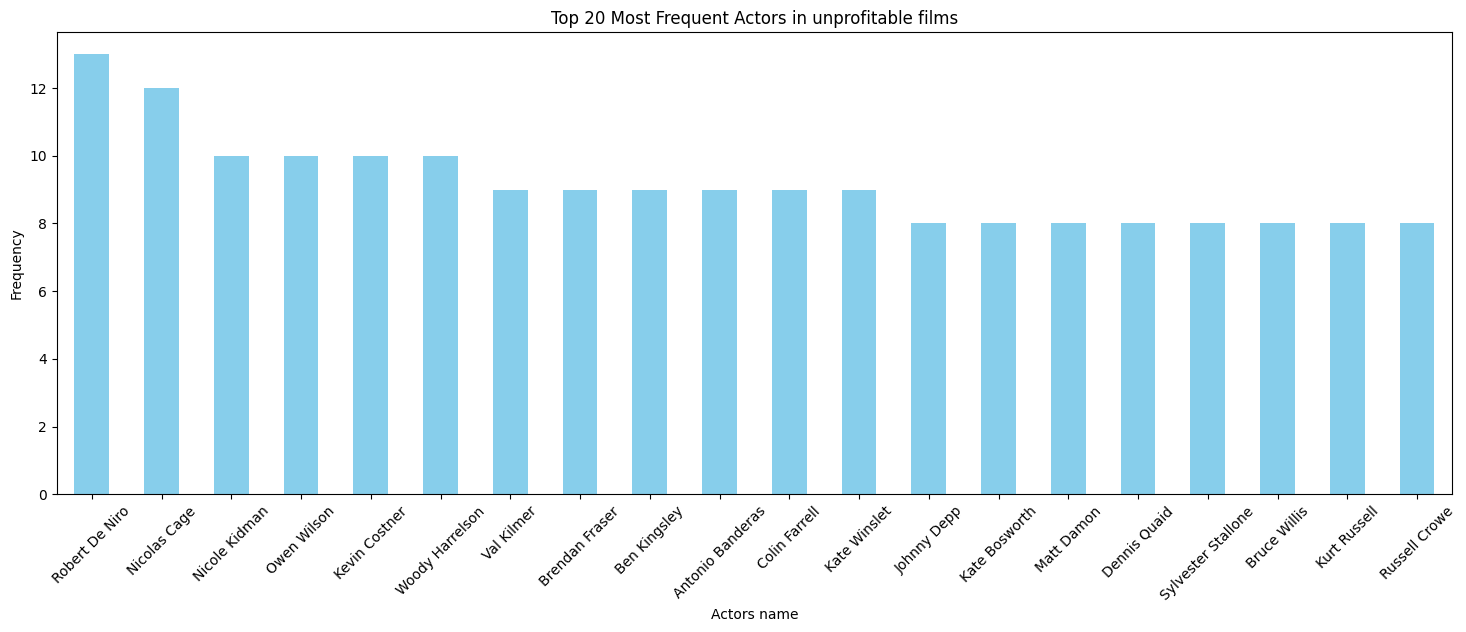

In [52]:
# Concatenate all three columns into a single Series
all_actors = pd.concat([df_no_profit['actor_1_name'], df_no_profit['actor_2_name'], df_no_profit['actor_3_name']])

# Count the occurrences of each actor
actor_counts = all_actors.value_counts()

# Plot the top N most frequent actors
N = 20  # Change N to plot more or fewer actors
top_names = actor_counts.head(N)

plt.figure(figsize=(18, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Actors in unprofitable films')
plt.xlabel('Actors name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Question 1: Which companies have contributed the most to the making of the film?
### Question 2: Which companies have made the most significant contributions to the production of profitable films?
### Question 3: Which companies have made the most significant contributions to the production of unprofitable films?

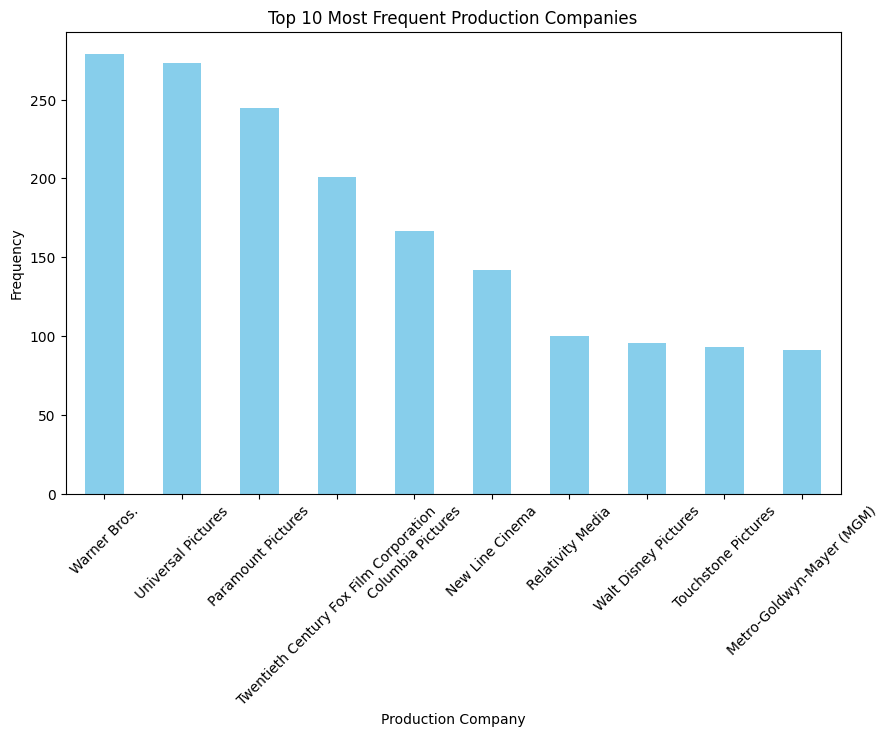

In [57]:
# Flatten the list of production companies
flat_list = [item for sublist in df_eda['production_companies_list'] for item in sublist]

# Count occurrences of each name
name_counts = pd.Series(flat_list).value_counts()

# Plot the top N most frequent names
N = 10  # Change N to plot more or fewer names
top_names = name_counts.head(N)

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [35]:
name_counts.head(10)

Warner Bros.                              279
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  91
Name: count, dtype: int64

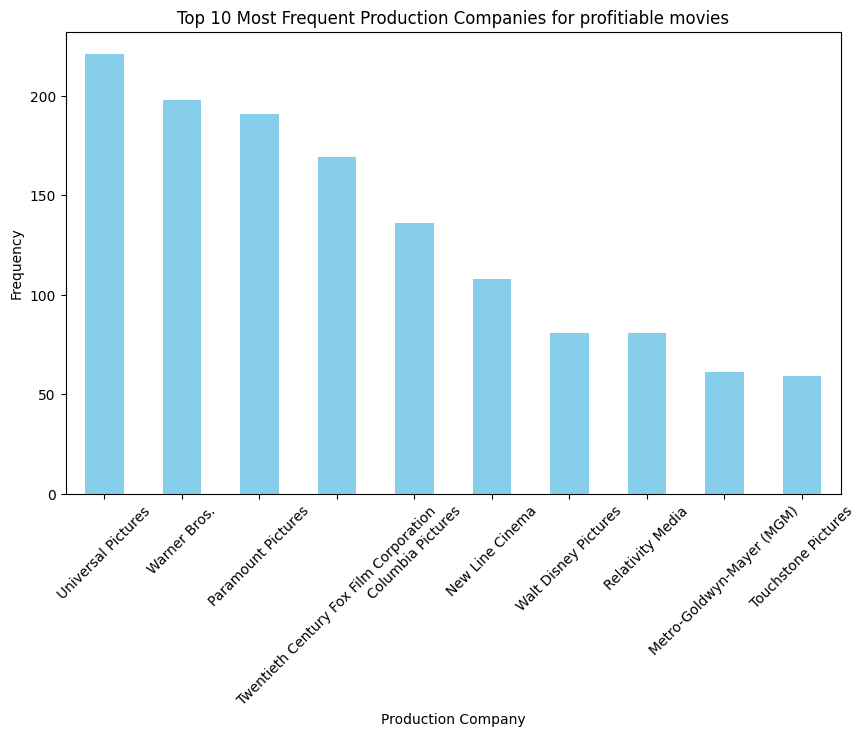

In [60]:
# Flatten the list of production companies
flat_list = [item for sublist in df_profit['production_companies_list'] for item in sublist]

# Count occurrences of each name
name_counts = pd.Series(flat_list).value_counts()

# Plot the top N most frequent names
N = 10  # Change N to plot more or fewer names
top_names = name_counts.head(N)

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Production Companies for profitiable movies')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

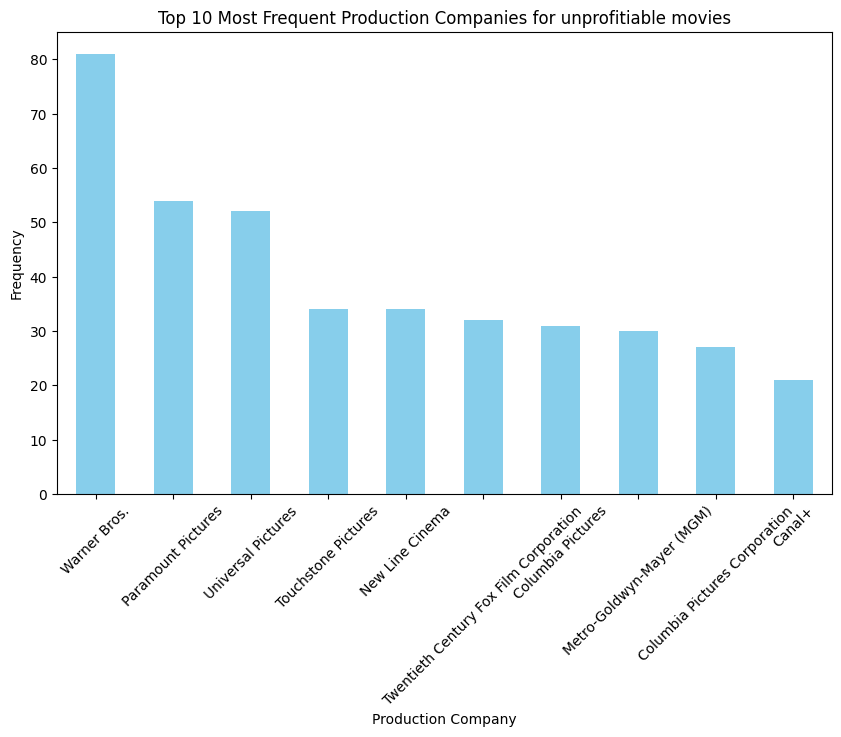

In [61]:
# Flatten the list of production companies
flat_list = [item for sublist in df_no_profit['production_companies_list'] for item in sublist]

# Count occurrences of each name
name_counts = pd.Series(flat_list).value_counts()

# Plot the top N most frequent names
N = 10  # Change N to plot more or fewer names
top_names = name_counts.head(N)

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue')
plt.title(f'Top {N} Most Frequent Production Companies for unprofitiable movies')
plt.xlabel('Production Company')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [85]:
top_names

Warner Bros.                              81
Paramount Pictures                        54
Universal Pictures                        52
Touchstone Pictures                       34
New Line Cinema                           34
Twentieth Century Fox Film Corporation    32
Columbia Pictures                         31
Metro-Goldwyn-Mayer (MGM)                 30
Columbia Pictures Corporation             27
Canal+                                    21
Name: count, dtype: int64

#### We will now delve deeper into the analysis of three prominent companies that have been involved in both profitable and non-profitable film ventures:
- Warner Bros.                              
- Paramount Pictures                        
- Universal Pictures

In [79]:
# Create a boolean mask to identify rows where 'Warner Bros' appears in production_companies_list
company_name = 'Warner Bros'
warner_mask = df_eda['production_companies_list'].apply(lambda x: 'Warner Bros.' in x)

# Apply the mask to filter rows
df_warner = df_eda[warner_mask]

print(f"mean of votes for {company_name}: {df_warner['vote_average'].mean()}")
print(f"mean of popularity for {company_name}: {df_warner['popularity'].mean()}")
print(f"mean of budget for {company_name}: {df_warner['budget'].mean()}")

mean of votes for Warner Bros: 6.420071684587814
mean of popularity for Warner Bros: 39.77394818996416
mean of budget for Warner Bros: 63.95589229032258


In [80]:
# Create a boolean mask to identify rows where 'Warner Bros' appears in production_companies_list
company_name = 'Universal Pictures'
universal_mask = df_eda['production_companies_list'].apply(lambda x: company_name in x)

# Apply the mask to filter rows
df_universal = df_eda[universal_mask]

print(f"mean of votes for {company_name}: {df_universal['vote_average'].mean()}")
print(f"mean of popularity for {company_name}: {df_universal['popularity'].mean()}")
print(f"mean of budget for {company_name}: {df_universal['budget'].mean()}")

mean of votes for Universal Pictures: 6.3227106227106225
mean of popularity for Universal Pictures: 34.25609419047619
mean of budget for Universal Pictures: 47.19914385714286


In [86]:
company_name = 'Paramount Pictures'

paramount_mask = df_eda['production_companies_list'].apply(lambda x: company_name in x)

# Apply the mask to filter rows
df_paramount = df_eda[universal_mask]

print(f"mean of votes for {company_name}: {df_paramount['vote_average'].mean()}")
print(f"mean of popularity for {company_name}: {df_paramount['popularity'].mean()}")
print(f"mean of budget for {company_name}: {df_paramount['budget'].mean()}")

mean of votes for Paramount Pictures: 6.3227106227106225
mean of popularity for Paramount Pictures: 34.25609419047619
mean of budget for Paramount Pictures: 47.19914385714286


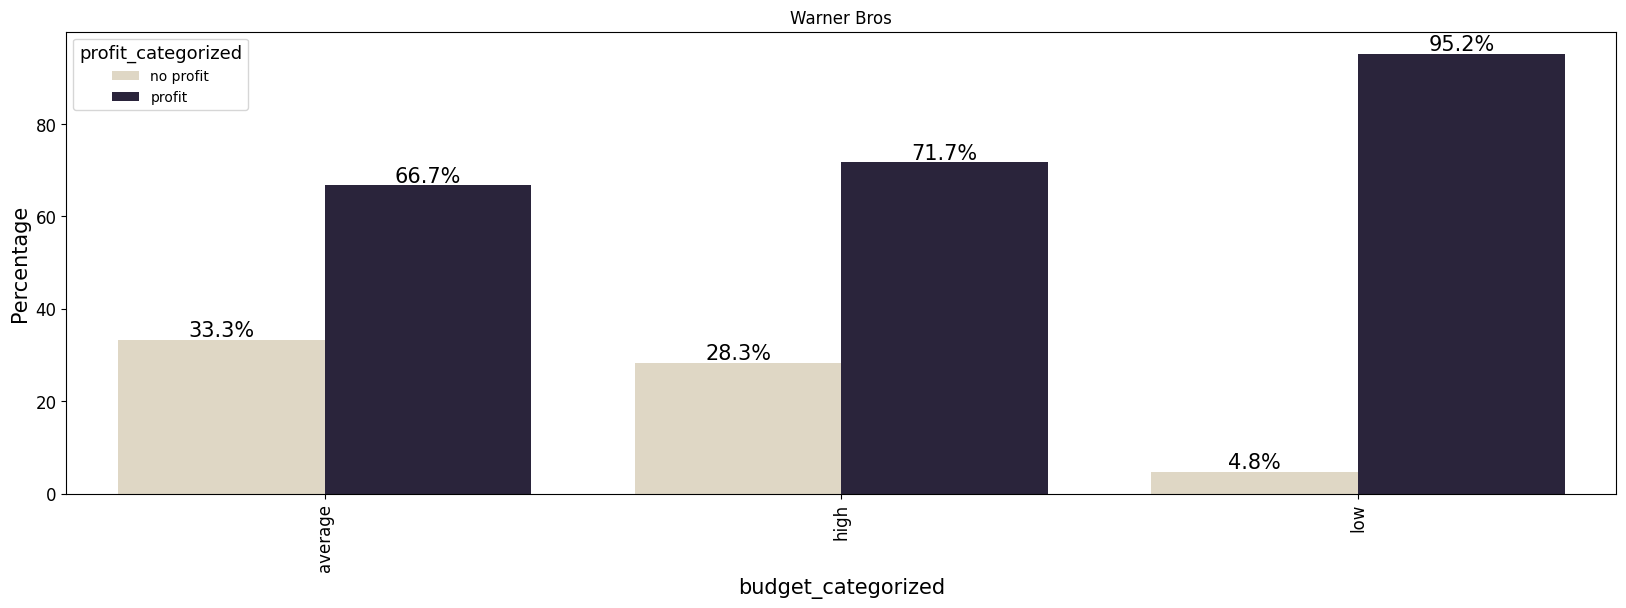

In [84]:
plot_categorical_distribution(df=df_warner, x_column='budget_categorized', hue_column='profit_categorized', title='Warner Bros')

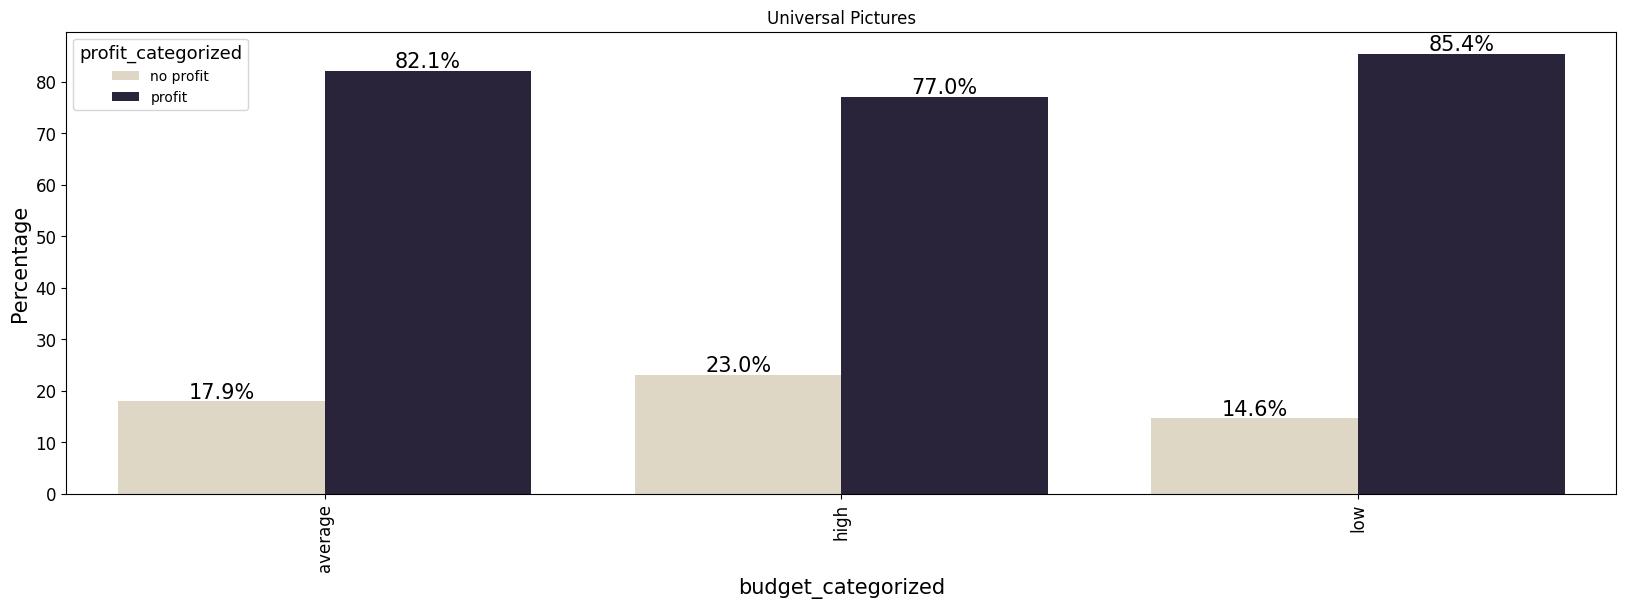

In [83]:
plot_categorical_distribution(df=df_universal, x_column='budget_categorized', hue_column='profit_categorized', title='Universal Pictures')

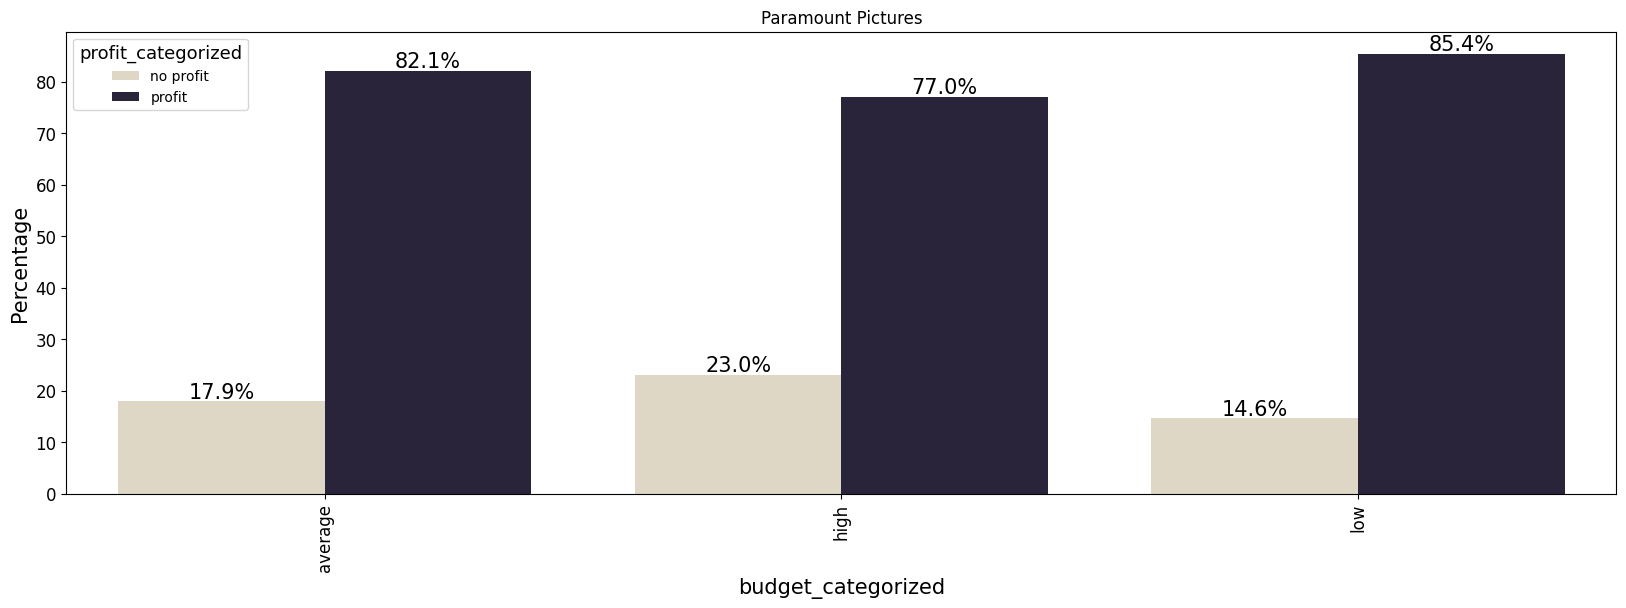

In [88]:
plot_categorical_distribution(df=df_paramount, x_column='budget_categorized', hue_column='profit_categorized', title='Paramount Pictures')

#### In the analysis focusing on Warner Bros., Paramount Pictures, and Universal Pictures across profitable and non-profitable films, it is evident that Warner Bros. emerges as the company with the highest percentage of profitable movies compared to the others. This finding underscores Warner Bros.' consistent success in producing commercially viable films, reflecting positively on its financial performance and strategic decision-making within the film industry.

# EDA for Machine Learning

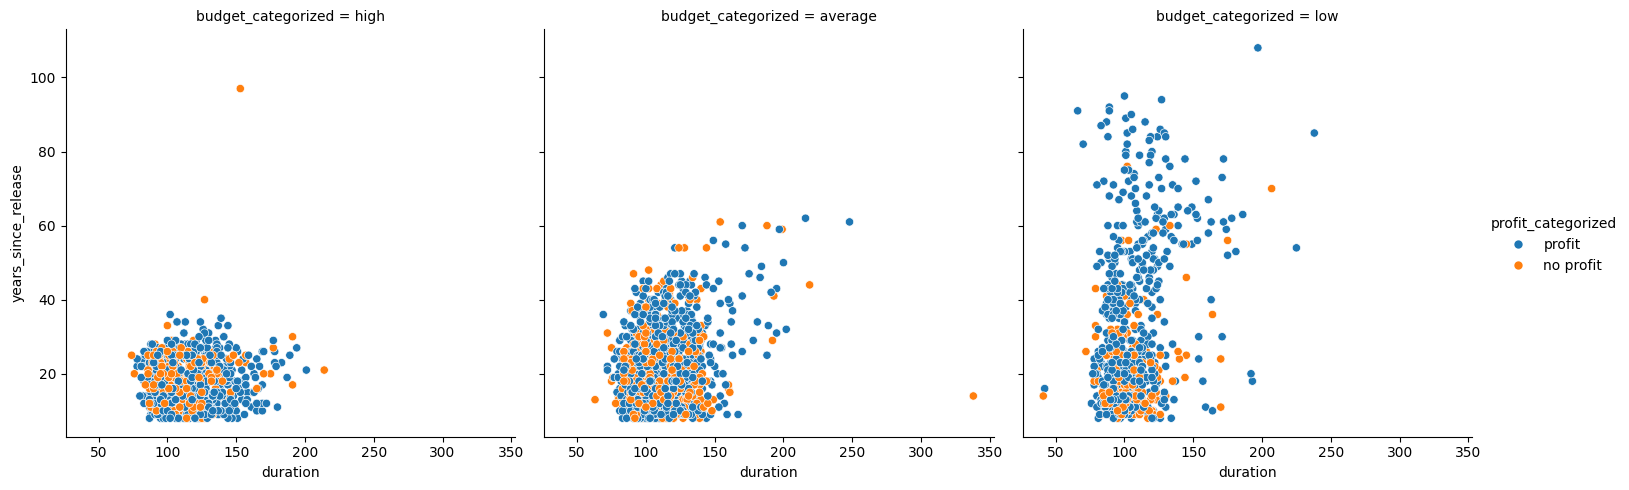

In [96]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,hue='profit_categorized')

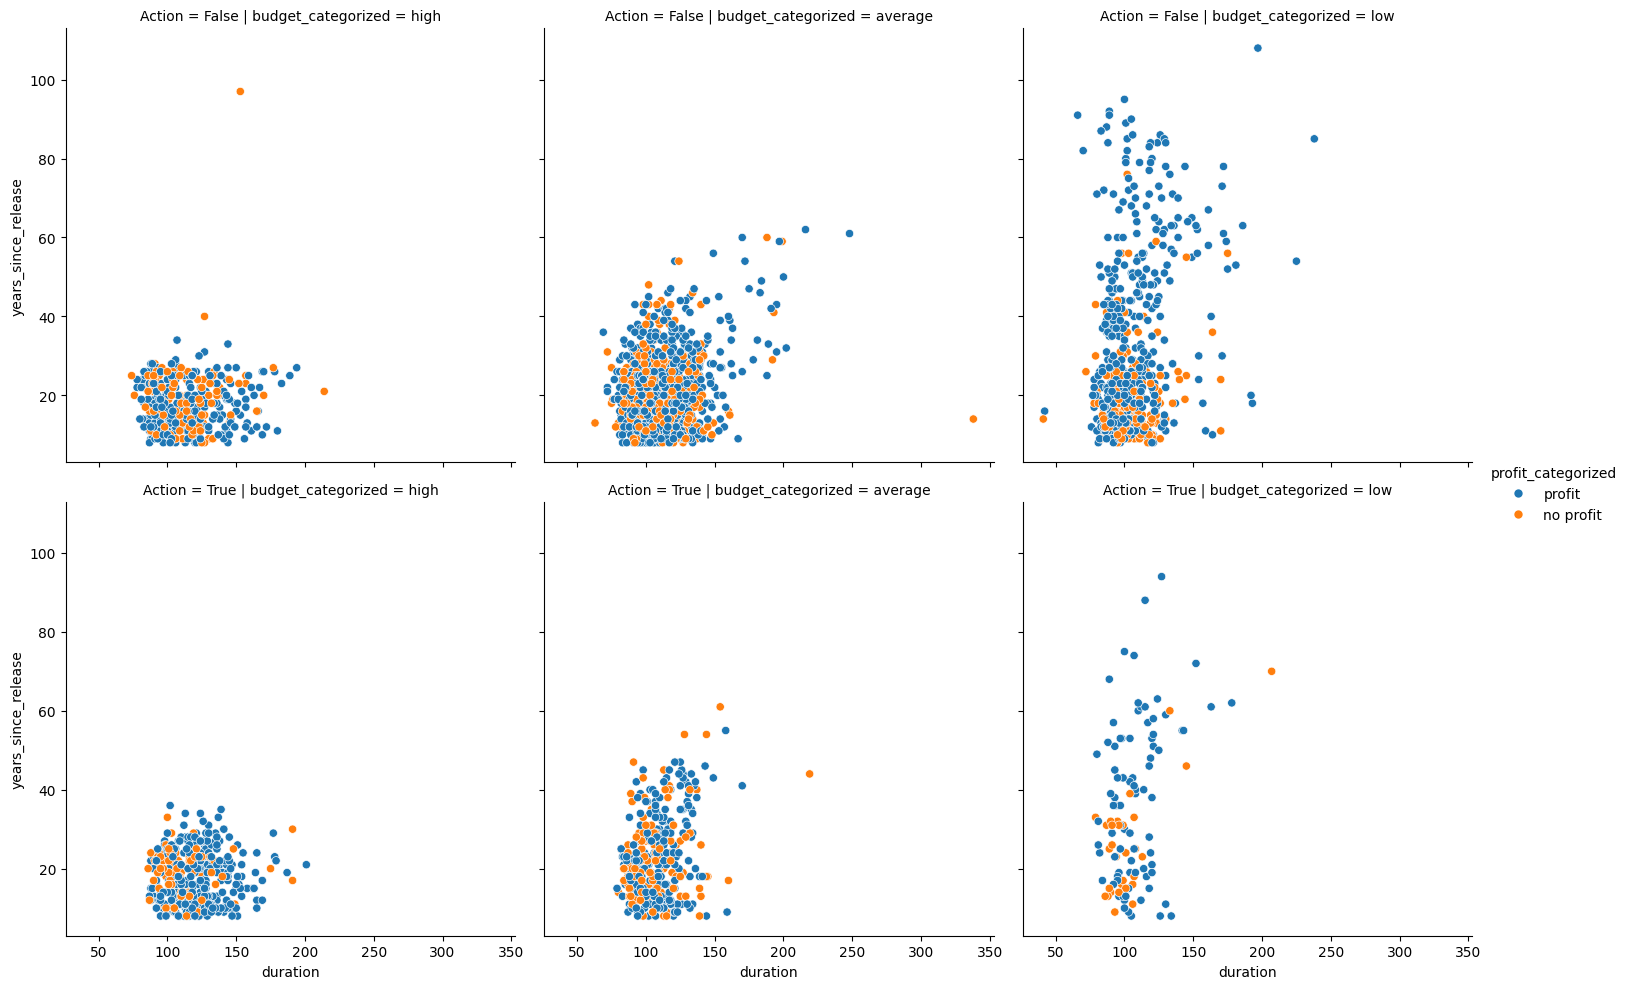

In [97]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,row='Action' ,hue='profit_categorized')

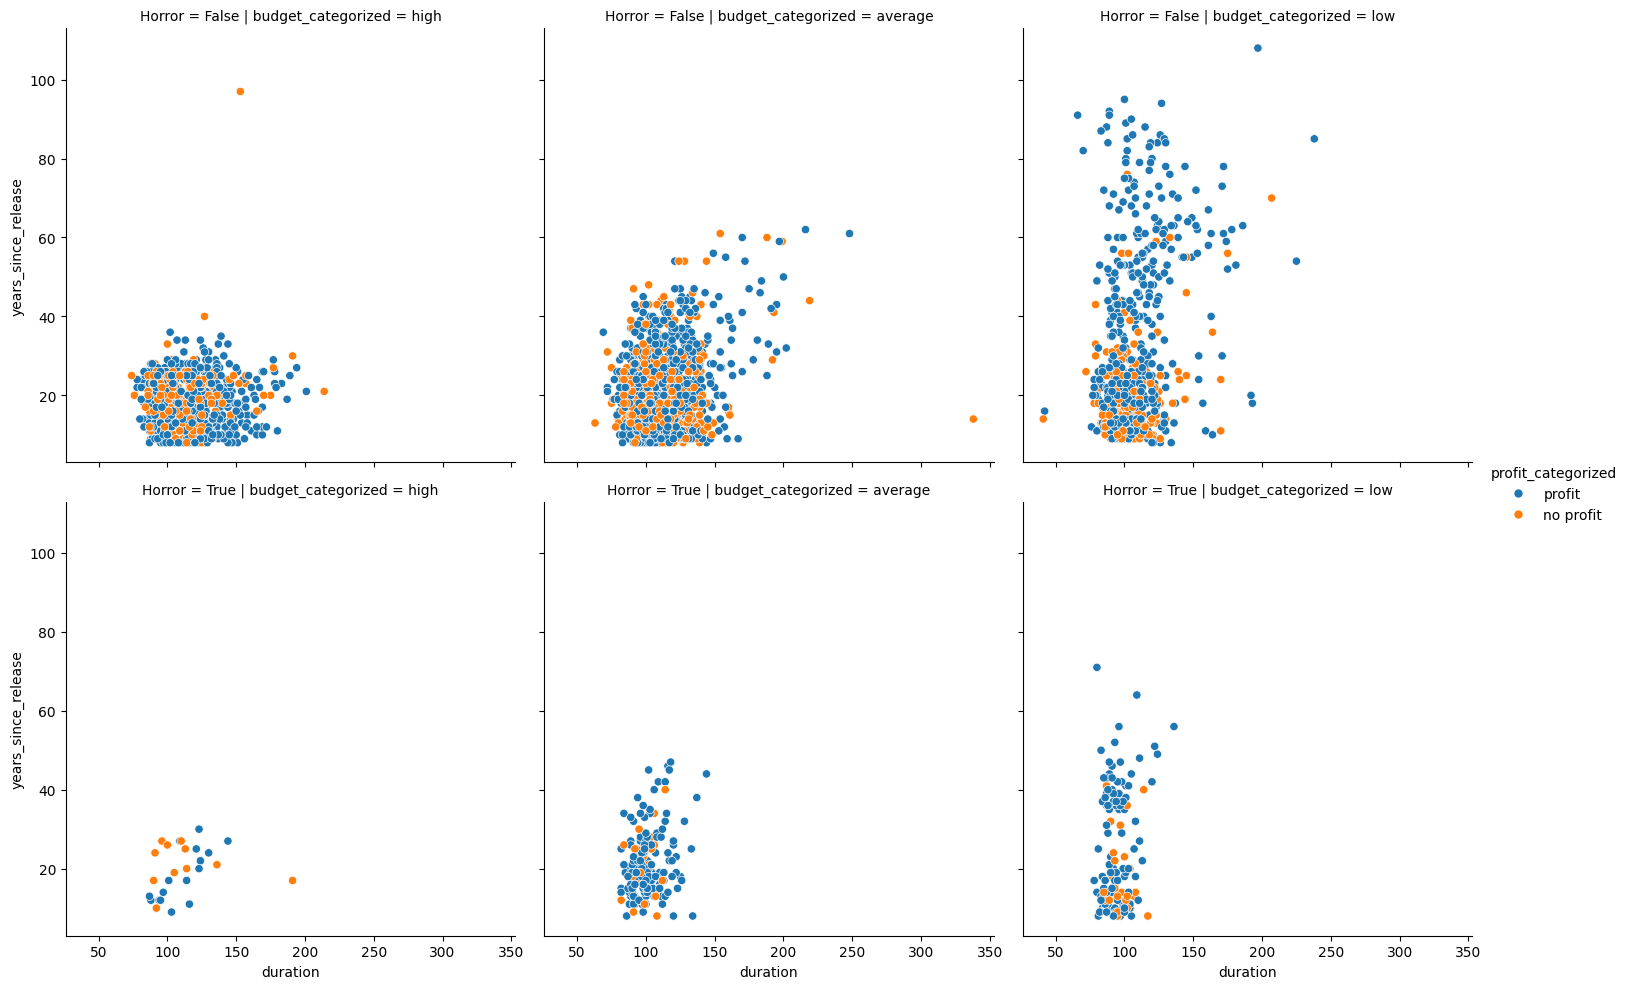

In [98]:
sns.relplot(data=df_eda, x='duration', y='years_since_release', 
            col='budget_categorized' ,row='Horror' ,hue='profit_categorized')

In [99]:
      ['Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller']

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Mystery',
 'Romance',
 'Science Fiction',
 'Thriller']